In [ ]:
!pip install tensorflow

In [ ]:
!pip install tldextract

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM


from pandas import read_csv, concat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
import tldextract
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/training.csv')
df2 = pd.read_csv('/content/drive/MyDrive/validating.csv')

In [ ]:
df1.head()

,1,q+Z8AnwaBA.hidemyself.org.
0,1,q+Z8A3wbBA.hidemyself.org.
1,1,q+Z8BHwcBA.hidemyself.org.
2,1,q+Z8BXwdBA.hidemyself.org.
3,1,q+Z8BnweCORdAGL4+W7DB5xH1cUwcwM1gejAQoJF8hbs2J...
4,1,q+Z8B3wfBA.hidemyself.org.


In [ ]:
df2.head()

,1,q+aJ04nrBA.hidemyself.org.
0,1,q+aJ1InsBA.hidemyself.org.
1,1,q+aJ1YntBA.hidemyself.org.
2,1,q+aJ1onuCDT2aA0NEkzbTnzRPgWJE7aYtQhjcSmnj74ufU...
3,1,q+aJ14nvCHKAcMCkiIhCb3eY1s8cgWt39jSJuK4299f/S5...
4,1,q+aJ2InwCI74Nywtr9b/7Tu8nQJNA2RceRMuYQUxrPJiwI...


In [ ]:
tunnel_full = pd.concat([df1, df2], ignore_index=True)

In [ ]:
from google.colab import files

In [ ]:
# Save the merged DataFrame to a new CSV file
merged_csv_path = 'merged_data.csv'
tunnel_full.to_csv(merged_csv_path, index=False)

# Download the CSV file
files.download(merged_csv_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ful_tun = pd.read_csv('/content/tunnel_ful_new.csv')

In [ ]:
ful_tun.shape

(19998, 3)

In [ ]:
ful_tun.head()

,1,q+Z8AnwaBA.hidemyself.org.,q+aJ04nrBA.hidemyself.org.
0,1,q+Z8A3wbBA.hidemyself.org.,NaN
1,1,q+Z8BHwcBA.hidemyself.org.,NaN
2,1,q+Z8BXwdBA.hidemyself.org.,NaN
3,1,q+Z8BnweCORdAGL4+W7DB5xH1cUwcwM1gejAQoJF8hbs2J...,NaN
4,1,q+Z8B3wfBA.hidemyself.org.,NaN


In [ ]:
ful_tun = ful_tun.drop_duplicates()

In [ ]:
ful_tun.shape

(19962, 3)

In [ ]:
ful_tun = pd.concat([ful_tun.pop('1'), ful_tun], axis=1)

In [ ]:
ful_tun.shape

(19962, 3)

In [ ]:
ful_tun.head()

,1,q+Z8AnwaBA.hidemyself.org.,q+aJ04nrBA.hidemyself.org.
0,1,q+Z8A3wbBA.hidemyself.org.,NaN
1,1,q+Z8BHwcBA.hidemyself.org.,NaN
2,1,q+Z8BXwdBA.hidemyself.org.,NaN
3,1,q+Z8BnweCORdAGL4+W7DB5xH1cUwcwM1gejAQoJF8hbs2J...,NaN
4,1,q+Z8B3wfBA.hidemyself.org.,NaN


In [ ]:
ful_tun = ful_tun.rename(columns={'q+Z8AnwaBA.hidemyself.org.': 'domain'})

In [ ]:
ful_tun = ful_tun.rename(columns={'1': 'label'})

In [ ]:
ful_tun.head()

,label,domain,q+aJ04nrBA.hidemyself.org.
0,1,q+Z8A3wbBA.hidemyself.org.,NaN
1,1,q+Z8BHwcBA.hidemyself.org.,NaN
2,1,q+Z8BXwdBA.hidemyself.org.,NaN
3,1,q+Z8BnweCORdAGL4+W7DB5xH1cUwcwM1gejAQoJF8hbs2J...,NaN
4,1,q+Z8B3wfBA.hidemyself.org.,NaN


In [ ]:
ful_tun = ful_tun.drop(columns='q+aJ04nrBA.hidemyself.org.')

In [ ]:
ful_tun = pd.concat([ful_tun.pop('domain'), ful_tun], axis=1)

In [ ]:
ful_tun['domain'] = ful_tun['domain'].astype(str)

In [ ]:
ful_tun.head()

,domain,label
0,q+Z8A3wbBA.hidemyself.org.,1
1,q+Z8BHwcBA.hidemyself.org.,1
2,q+Z8BXwdBA.hidemyself.org.,1
3,q+Z8BnweCORdAGL4+W7DB5xH1cUwcwM1gejAQoJF8hbs2J...,1
4,q+Z8B3wfBA.hidemyself.org.,1


In [ ]:
good = pd.read_csv('/content/drive/MyDrive/alexa_new.csv')

In [ ]:
good.head()

,domain,label
0,google.com,0
1,youtube.com,0
2,facebook.com,0
3,baidu.com,0
4,wikipedia.org,0


In [ ]:
good = pd.read_csv('/content/drive/MyDrive/alexa_new.csv', nrows=20000)

In [ ]:
good.shape

(20000, 2)

In [ ]:
tun_com = pd.concat([good, ful_tun], ignore_index=True)

In [ ]:
good = good.dropna(subset=['domain'])

In [ ]:
ful_tun = ful_tun.dropna(subset=['domain'])

In [ ]:
good['tld'] = [tldextract.extract(d).domain for d in good['domain']]
ful_tun['tld'] = [tldextract.extract(d).domain for d in ful_tun['domain']]

good = good[-good['tld'].str.contains('\`|\.')]
ful_tun = ful_tun[-ful_tun['tld'].str.contains('\`|\.')]

In [ ]:
allDomains = concat([good, ful_tun], ignore_index=True)
allDomains = allDomains.sample(frac=1).reset_index(drop=True)

X, y = allDomains['tld'], allDomains['label']

In [ ]:
allDomains.head()

,domain,label,tld
0,umsystem.edu,0,umsystem
1,q+aHCIcgBA.hidemyself.org.,1,hidemyself
2,rit.edu,0,rit
3,imguol.com.,0,imguol
4,maricopa.edu,0,maricopa


In [ ]:
validChars = {x: idx + 1 for idx, x in enumerate(set(''.join(X))) }

maxFeatures = len(validChars) + 1
maxlen = np.max([len(x) for x in X])

In [ ]:
X = [[validChars[y] for y in x] for x in X]
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense

In [ ]:
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Embedding(maxFeatures, 128))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tflite_support

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 24.2 MB/s eta 0:00:00


In [ ]:
model.fit(X_train, y_train, batch_size=16, epochs=1)

1999/1999 [==============================] - 163s 79ms/step - loss: 0.1453


In [ ]:
domain = [[validChars[ch] for ch in tldextract.extract('wikipedia.com').domain]]
domain = pad_sequences(domain, maxlen=maxlen)

model.predict(domain)

1/1 [==============================] - 1s 714ms/step


array([[2.1736418e-05]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix

250/250 [==============================] - 9s 35ms/step


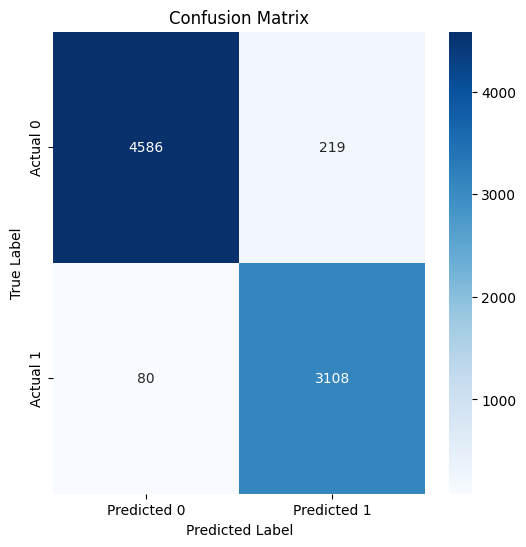

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4805
           1       0.93      0.97      0.95      3188

    accuracy                           0.96      7993
   macro avg       0.96      0.96      0.96      7993
weighted avg       0.96      0.96      0.96      7993



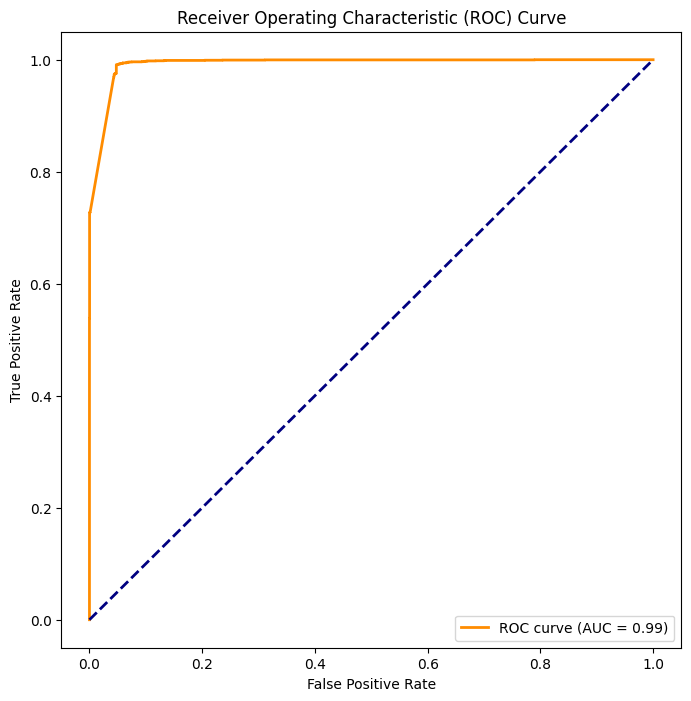

ROC-AUC Score: 0.9925480828862656


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Assuming you have a trained LSTM model named 'model'
# and your test set is 'X_test', 'y_test'

# Predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense
import pandas as pd
from google.colab import files
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# Tokenize and pad the sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(allDomains['domain'])
sequences = tokenizer.texts_to_sequences(allDomains['domain'])
padded_sequences = pad_sequences(sequences)

# Build and train your LSTM model (replace this with your actual model architecture and training code)
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=padded_sequences.shape[1]))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_sequences, allDomains['label'], epochs=1, batch_size=16)

# Save the trained model to an h5 file
model.save('your_lstm_model.h5')


2498/2498 [==============================] - 159s 62ms/step - loss: 0.0831 - accuracy: 0.9666


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:


# Example domain to predict
example_domain = ['q+aLIIs4CFUKvnN5iupTAI5r8crk5/glcKQeId/x3vsmvyFH2ocIo7hHaWqXchY.T5VckY5lWpSA/NgnMYxgMIAo0rJ8zzBNgGNDoED+ZG5SwfUbp/xsWIB8rOjJslY.jdswXir0ht6cOcT96qKeuj0vp/6f11rrNtkV62vLjgjd/7QNDM.hidemyself.org.']

# Load the pre-trained LSTM model
model_path = '/content/your_lstm_model.h5'  # Replace with the actual path
model = load_model(model_path)

# Tokenize and pad the sequences for the example domain
tokenizer = Tokenizer()
tokenizer.fit_on_texts(example_domain)
sequences = tokenizer.texts_to_sequences(example_domain)

# Adjust the maxlen parameter to match the expected sequence length (e.g., 25)
padded_sequences = pad_sequences(sequences, maxlen=25)

# Make predictions
predictions = model.predict(padded_sequences)

# Convert probabilities to class predictions
predicted_class = 1 if predictions[0][0] > 0.5 else 0

# Display the prediction result
if predicted_class == 1:
    print(f"The domain '{example_domain[0]}' is predicted as DNS Tunneling (Class 1).")
else:
    print(f"The domain '{example_domain[0]}' is predicted as benign (Class 0).")


1/1 [==============================] - 2s 2s/step
The domain 'q+aLIIs4CFUKvnN5iupTAI5r8crk5/glcKQeId/x3vsmvyFH2ocIo7hHaWqXchY.T5VckY5lWpSA/NgnMYxgMIAo0rJ8zzBNgGNDoED+ZG5SwfUbp/xsWIB8rOjJslY.jdswXir0ht6cOcT96qKeuj0vp/6f11rrNtkV62vLjgjd/7QNDM.hidemyself.org.' is predicted as DNS Tunneling (Class 1).


In [ ]:


# Example domain to predict
example_domain = ['google.com']

# Load the pre-trained LSTM model
model_path = '/content/your_lstm_model.h5'  # Replace with the actual path
model = load_model(model_path)

# Tokenize and pad the sequences for the example domain
tokenizer = Tokenizer()
tokenizer.fit_on_texts(example_domain)
sequences = tokenizer.texts_to_sequences(example_domain)

# Adjust the maxlen parameter to match the expected sequence length (e.g., 25)
padded_sequences = pad_sequences(sequences, maxlen=25)

# Make predictions
predictions = model.predict(padded_sequences)

# Convert probabilities to class predictions
predicted_class = 1 if predictions[0][0] > 0.5 else 0

# Display the prediction result
if predicted_class == 1:
    print(f"The domain '{example_domain[0]}' is predicted as DNS Tunneling (Class 1).")
else:
    print(f"The domain '{example_domain[0]}' is predicted as benign (Class 0).")


1/1 [==============================] - 1s 770ms/step
The domain 'google.com' is predicted as benign (Class 0).


In [ ]:
import tensorflow as tf

In [ ]:
tf.saved_model.save(model, '/content/drive/MyDrive/Colab Notebooks/saved_model1')